In [21]:
import matplotlib
import matplotlib.pyplot as plt
import json
import pickle
import numpy as np
import nltk
nltk.download('punkt')
from evaluate import bleu, cider, meteor, rouge, spice
#from sample import get_sentence

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/volhaleusha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
with open('dataset_coco.json', 'r') as f:
    captions = json.load(f)
    
with open('data/captions_val2017.json', 'r') as f:
    captions_coco = json.load(f)     

In [28]:
captions.keys()

dict_keys(['images', 'dataset'])

In [23]:
print(captions_coco.keys())
print(captions_coco['annotations'])


dict_keys(['info', 'licenses', 'images', 'annotations'])
[{'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}, {'image_id': 179765, 'id': 182, 'caption': 'A Honda motorcycle parked in a grass driveway'}, {'image_id': 190236, 'id': 401, 'caption': 'An office cubicle with four different types of computers.'}, {'image_id': 331352, 'id': 441, 'caption': 'A small closed toilet in a cramped space.'}, {'image_id': 517069, 'id': 447, 'caption': 'Two women waiting at a bench next to a street.'}, {'image_id': 179765, 'id': 479, 'caption': 'A black Honda motorcycle with a dark burgundy seat.'}, {'image_id': 331352, 'id': 540, 'caption': 'A tan toilet and sink combination in a small room.'}, {'image_id': 190236, 'id': 644, 'caption': 'The home office space seems to be very cluttered.'}, {'image_id': 182417, 'id': 856, 'caption': 'A beautiful dessert waiting to be shared by two people'}, {'image_id': 517069, 'id': 882, 'caption': 'A woman sitting on a 

### Train vs Validation loss for 1-Layer LSTM w/t attention

In [24]:
with open('1layerold/output/predicted1_4.json') as f:
    pred1_4 = json.load(f)

with open('1layerold/output/predicted1_5.json') as f:
    pred1_5 = json.load(f)
    
with open('1layerold/output/predicted1_10.json') as f:
    pred1_10 = json.load(f)

In [25]:
lengths = []
caps = captions['annotations']
for cap in caps:
    if cap['image_id'] == 161 + 23431:
        print(cap['caption'])
    token = nltk.tokenize.word_tokenize(str(cap['caption']).lower())

    lengths.append(len(token))   

Living room where there is an old white TV with a car being shown, a blue carpet, yellow walls, and a white analog clock above the TV
A television set on a small wooden stand against a wall with a clock next to some unplugged electronic audio devices.
A clock sits against a yellow-green wall above a TV and rug, and the entire image is rotated counter-clockwise 90 degrees.
A room with a TV and on the TV it is showing a car
GREY TV SET ON TOP OF A BROWN TV STAND


In [26]:
print(pred1_4['VizWiz_val_00000001.jpg'])
print(pred1_5['VizWiz_val_00000001.jpg'])
print(pred1_10['VizWiz_val_00000001.jpg'])


<start> a hand holding a bottle of lotion with a blue label . <end>
<start> a person is holding a bottle of medicine . <end>
<start> a hand holding a small bottle of a liquid in a room with a window and a window with


<start> <start> a white house is shown in the image . <end>
{'testlen': 8, 'reflen': 9, 'guess': [8, 7, 6, 5], 'correct': [1, 0, 0, 0]}
ratio: 0.8888888887901236
bleu = [0.11031211279549655, 3.729230059054939e-09, 1.2694046860151317e-11, 7.751502103232947e-13]
cider = 0.0017928926053769165
rouge = 0.06149193548387097


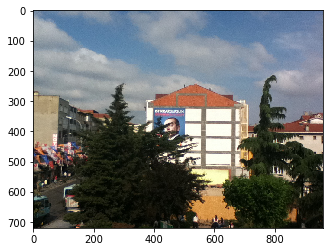

In [101]:
%run sample.py --image 'VizWiz_val_00000020.jpg' --image_path 'data/val' --encoder_path 'models/encoder1-10.ckpt'\
--decoder_path 'models/decoder1-10.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 1 --model_type 'no_attention' 

VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> a computer screen with a blue background and white text . <end>
{'testlen': 10, 'reflen': 10, 'guess': [10, 9, 8, 7], 'correct': [4, 3, 2, 1]}
ratio: 0.9999999999000002
bleu = [0.3999999999200002, 0.36514837159505265, 0.3218297948003036, 0.26269098938469176]
cider = 0.9643966076387905
rouge = 0.37770897832817335


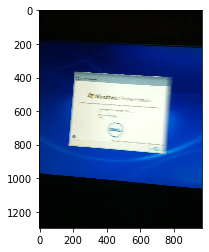

In [3]:
print('VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image 'VizWiz_val_00000005.jpg' --image_path 'data/val' --encoder_path 'models/encoder1-4.ckpt'\
--decoder_path 'models/decoder1-4.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 1 --model_type 'no_attention'

In [20]:
lengths = []
caps = captions['annotations']
for cap in caps:
    if cap['image_id'] == 5 + 23431:
        print(cap['caption'])
    token = nltk.tokenize.word_tokenize(str(cap['caption']).lower())

    lengths.append(len(token)) 

a DELL laptop computer screen  showing window 7 home premium
A computer screen with a windows dialogue box containing the login.
Computer screen showing a Windows 7 home premium window with a Dell logo on it.
A dell laptop with windows 7 home screen.
window screen of dell desktop or laptop showed box of windows 7


In [ ]:
print(pred1_4['VizWiz_val_00000005.jpg'])
print(pred1_5['VizWiz_val_00000005.jpg'])
print(pred1_10['VizWiz_val_00000005.jpg'])

VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> quality issues are too severe to recognize visual content . <end>
{'testlen': 10, 'reflen': 9, 'guess': [10, 9, 8, 7], 'correct': [7, 6, 5, 4]}
ratio: 1.1111111109876546
bleu = [0.6999999999300001, 0.6831300509918651, 0.6631762012417651, 0.6389431041697642]
cider = 6.731697097238667
rouge = 0.7439024390243903


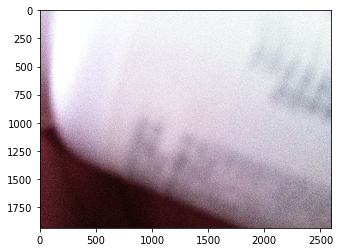

In [69]:
print('VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image 'VizWiz_val_00000027.jpg' --image_path 'data/val' --encoder_path 'models/encoder1-4.ckpt'\
--decoder_path 'models/decoder1-4.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 1 --model_type 'no_attention'

VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> quality issues are too severe to recognize visual content . <end>
{'testlen': 10, 'reflen': 9, 'guess': [10, 9, 8, 7], 'correct': [7, 6, 5, 4]}
ratio: 1.1111111109876546
bleu = [0.6999999999300001, 0.6831300509918651, 0.6631762012417651, 0.6389431041697642]
cider = 5.3853576777909336
rouge = 0.7439024390243903


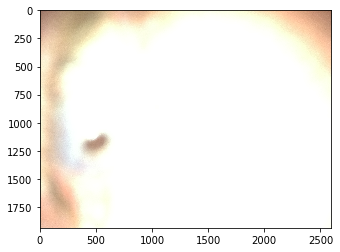

In [60]:
print('VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image 'VizWiz_val_00000014.jpg' --image_path 'data/val' --encoder_path 'models/encoder1-10.ckpt'\
--decoder_path 'models/decoder1-10.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 1 --model_type 'no_attention'

<start> <start> a remote control sitting on a table . <end>
{'testlen': 7, 'reflen': 9, 'guess': [7, 6, 5, 4], 'correct': [0, 0, 0, 0]}
ratio: 0.7777777776913581
bleu = [1.0735389898008262e-16, 1.1595546370745083e-16, 1.2642785332855274e-16, 1.3958734299260755e-16]
cider = 0.0
rouge = 0.0


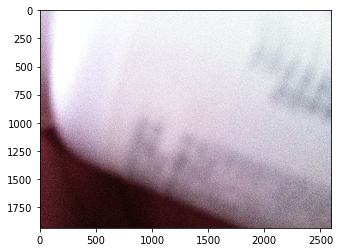

In [70]:
%run sample.py --image 'VizWiz_val_00000027.jpg' --image_path 'data/val' --encoder_path 'models/encoder-5-3000.pkl'\
--decoder_path 'models/decoder-5-3000.pkl' --vocab_path 'data/vocab2.pkl' --num_layers 1 --model_type 'no_attention'


In [84]:
caps_coco = captions_coco['annotations']
for cap in caps_coco:
    if cap['image_id'] == 492968:
        print(cap['caption'])

A snowboarder with black and white clothes finishing a run.
A man riding a snowboard down a snow covered slope.
A man on a snow board going down a snow covered hill.
This image is of a man snowboarding down a hill.
a ski boarder skiing down the side of a mountain.


Coco image caption prediction for trained from scratch  on VizWiz  LSTM
<start> a picture of a living room with a tv in the background <end>
{'testlen': 11, 'reflen': 11, 'guess': [11, 10, 9, 8], 'correct': [7, 3, 0, 0]}
ratio: 0.999999999909091
bleu = [0.636363636247934, 0.43693144867122347, 2.7681823800578e-06, 7.175852913353726e-09]
cider = 1.1753696718209181
rouge = 0.36363636363636365


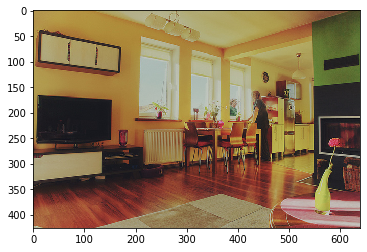

In [44]:
print('Coco image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image '000000000139.jpg' --image_path 'data/val2017' --encoder_path 'models/encoder1-10.ckpt'\
--decoder_path 'models/decoder1-10.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 1 \
--caption_path 'data/captions_val2017.json' --model_type 'no_attention'

Coco image caption prediction for pretrained on Coco LSTM
<start> a living room with a television and a television . <end>
{'testlen': 9, 'reflen': 9, 'guess': [9, 8, 7, 6], 'correct': [7, 5, 3, 2]}
ratio: 0.9999999998888891
bleu = [0.7777777776049386, 0.6972166886186177, 0.5928155506075895, 0.5133450479131076]
cider = 1.6228301290736074
rouge = 0.6666666666666666


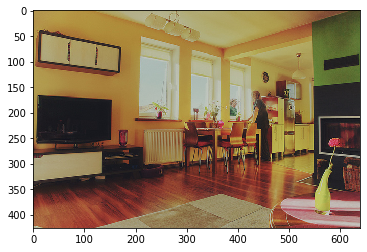

In [43]:
print('Coco image caption prediction for pretrained on Coco LSTM')
%run sample.py --image '000000000139.jpg' --image_path 'data/val2017'  --encoder_path 'models/encoder-5-3000.pkl'\
--decoder_path 'models/decoder-5-3000.pkl' --vocab_path 'data/vocab2.pkl' --num_layers 1 \
--caption_path 'data/captions_val2017.json' --model_type 'no_attention'

In [116]:
caps_coco = captions_coco['annotations']
for cap in caps_coco:
    if cap['image_id'] == 50679:
        print(cap['caption'])

A close-up of an orange on the side of the road.
an orange is on the white line on a street and some cars
a close up of an orange on a city street
An orange sitting in the middle of a road
An orange lying near the white stripe of a highway.


Coco image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> a pair of blue and white tennis shoes with a white and blue collar . <end>
{'testlen': 14, 'reflen': 14, 'guess': [14, 13, 12, 11], 'correct': [4, 1, 0, 0]}
ratio: 0.9999999999285716
bleu = [0.2857142856734695, 0.14824986331063453, 1.2234957141235069e-06, 3.592143419796611e-09]
cider = 0.48292437901715557
rouge = 0.24530831099195713


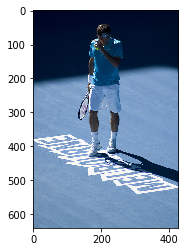

In [97]:
print('Coco image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image '000000033368.jpg' --image_path 'data/val2017' --encoder_path 'models/encoder1-4.ckpt'\
--decoder_path 'models/decoder1-4.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 1 \
--caption_path 'data/captions_val2017.json' --model_type 'no_attention'

Coco image caption prediction for pretrained on Coco LSTM
<start> <start> a woman holding a tennis racket in a tennis court . <end>
{'testlen': 10, 'reflen': 10, 'guess': [10, 9, 8, 7], 'correct': [6, 4, 3, 1]}
ratio: 0.9999999999000002
bleu = [0.5999999998800002, 0.516397779388174, 0.4641588832628592, 0.34572078456597183]
cider = 1.6695980538565256
rouge = 0.37770897832817335


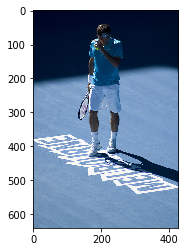

In [98]:
print('Coco image caption prediction for pretrained on Coco LSTM')
%run sample.py --image '000000033368.jpg' --image_path 'data/val2017'  --encoder_path 'models/encoder-5-3000.pkl'\
--decoder_path 'models/decoder-5-3000.pkl' --vocab_path 'data/vocab2.pkl' --num_layers 1 \
--caption_path 'data/captions_val2017.json' --model_type 'no_attention'

### Train vs Validation loss for 2-Layer LSTM w/t attention

VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> a computer screen with a blue background and white text . <end>
{'testlen': 10, 'reflen': 10, 'guess': [10, 9, 8, 7], 'correct': [4, 3, 2, 1]}
ratio: 0.9999999999000002
bleu = [0.3999999999200002, 0.36514837159505265, 0.3218297948003036, 0.26269098938469176]
cider = 0.9643966076387905
rouge = 0.37770897832817335


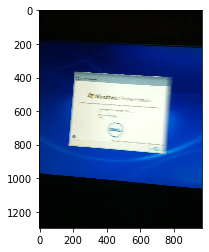

In [23]:
print('VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image 'VizWiz_val_00000005.jpg' --image_path 'data/Imagetest/val'\
--encoder_path 'models/encoder2-6.ckpt' --decoder_path 'models/decoder2-6.ckpt' \
--vocab_path 'data/vocab.pkl' --num_layers 2 --model_type 'no_attention'

#predict = get_sentence()

VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> a computer screen with a blue background and white text . <end>
{'testlen': 10, 'reflen': 10, 'guess': [10, 9, 8, 7], 'correct': [4, 3, 2, 1]}
ratio: 0.9999999999000002
bleu = [0.3999999999200002, 0.36514837159505265, 0.3218297948003036, 0.26269098938469176]
cider = 0.9643966076387905
rouge = 0.37770897832817335


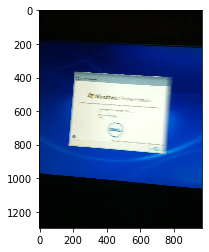

In [24]:
print('VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image 'VizWiz_val_00000005.jpg' --image_path 'data/Imagetest/val' --encoder_path 'models/encoder2-10.ckpt'\
--decoder_path 'models/decoder2-10.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 2  --model_type 'no_attention'


Coco image caption prediction for trained from scratch  on VizWiz  LSTM
<start> <start> a person wearing a blue and white striped shirt with a white and blue striped shirt on the front
{'testlen': 18, 'reflen': 14, 'guess': [18, 17, 16, 15], 'correct': [9, 4, 1, 0]}
ratio: 1.285714285622449
bleu = [0.49999999997222233, 0.3429971702654019, 0.1944555593549452, 2.646015952198224e-05]
cider = 0.5751406975441727
rouge = 0.38364779874213834


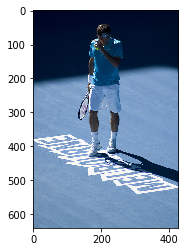

In [99]:
print('Coco image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image '000000033368.jpg' --image_path 'data/val2017' --encoder_path 'models/encoder2-6.ckpt'\
--decoder_path 'models/decoder2-6.ckpt' --vocab_path 'data/vocab.pkl' --num_layers 2 \
--caption_path 'data/captions_val2017.json' --model_type 'no_attention'

### Train vs Validation loss for  LSTM with attention

<start> a bottle of hand sanitizer with a white label . <end>
{'testlen': 9, 'reflen': 9, 'guess': [9, 8, 7, 6], 'correct': [4, 2, 0, 0]}
ratio: 0.9999999998888891
bleu = [0.4444444443456792, 0.3333333332569446, 2.5131581365004733e-06, 7.171781505449111e-09]
cider = 0.8592272397338441
rouge = 0.4444444444444444


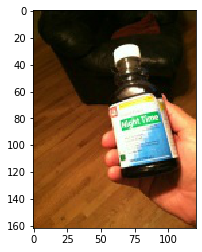

In [76]:
%run sample.py --image 'VizWiz_val_00000001.jpg' --image_path 'data/val' \
--encoder_path 'models/encoder-att-6.ckpt' --embed_size 256\
--decoder_path 'models/decoder-att-6.ckpt' --vocab_path 'data/vocab.pkl' --model_type 'attention'

<start> a room with a wooden table and a tv stand with a tv on it . <end>
{'testlen': 15, 'reflen': 11, 'guess': [15, 14, 13, 12], 'correct': [5, 2, 0, 0]}
ratio: 1.363636363512397
bleu = [0.33333333331111115, 0.21821789022092503, 1.5415080047990373e-06, 4.179882048905088e-09]
cider = 0.5062381006638639
rouge = 0.3490701001430615


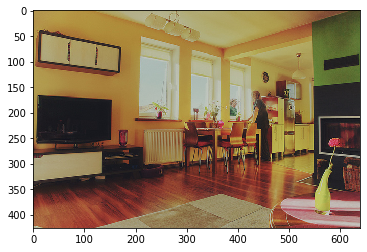

In [6]:
%run sample.py --image '000000000139.jpg' --image_path 'data/val2017' --encoder_path 'models/encoder-att-8.ckpt'\
--decoder_path 'models/decoder-att-8.ckpt' --vocab_path 'data/vocab.pkl' --embed_size 256\
--caption_path 'data/captions_val2017.json' --model_type 'attention'

<start> a white and black dog with a black collar <end>
{'testlen': 8, 'reflen': 8, 'guess': [8, 7, 6, 5], 'correct': [3, 1, 0, 0]}
ratio: 0.9999999998750002
bleu = [0.3749999999062502, 0.23145502488320774, 2.0745663328558076e-06, 6.500593258499926e-09]
cider = 0.35811203398214375
rouge = 0.25


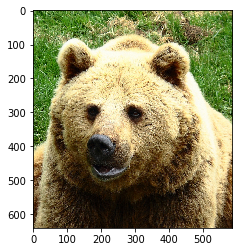

In [10]:
%run sample.py --image '000000000285.jpg' --image_path 'data/val2017' --encoder_path 'models/encoder-att-8.ckpt'\
--decoder_path 'models/decoder-att-8.ckpt' --vocab_path 'data/vocab.pkl' --embed_size 256\
--caption_path 'data/captions_val2017.json' --model_type 'attention'

['<start>', 'a', 'computer', 'screen', 'with', 'a', 'message', 'to', 'restore', 'a', 'computer', '.', '<end>']


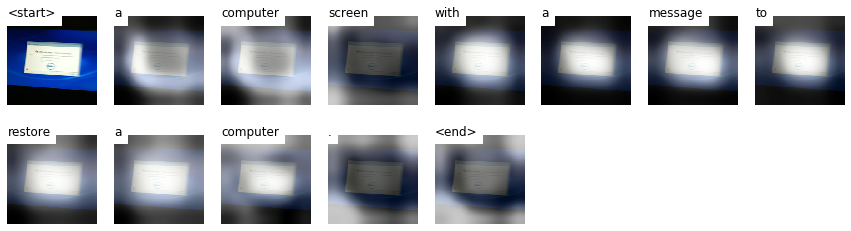

In [133]:
%run visualize_att.py --image 'VizWiz_val_00000005.jpg' --encoder_path 'models/encoder-att-8.ckpt'\
--decoder_path 'models/decoder-att-8.ckpt' 

<start> a small glass container of some sort of food <end>
{'testlen': 8, 'reflen': 9, 'guess': [8, 7, 6, 5], 'correct': [2, 0, 0, 0]}
ratio: 0.8888888887901236
bleu = [0.22062422559099293, 5.273927726724911e-09, 1.599349684745656e-11, 9.218141453123176e-13]
cider = 0.08082647403243715
rouge = 0.116412213740458


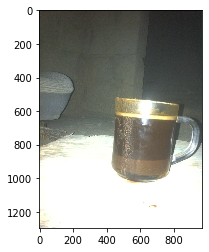

In [57]:
%run sample.py --image 'VizWiz_val_00001623.jpg' --image_path 'data/val' \
--encoder_path 'models/encoder-att-8.ckpt'\
--decoder_path 'models/decoder-att-8.ckpt' --vocab_path 'data/vocab.pkl' --model_type 'attention'

['<start>', 'a', 'small', 'glass', 'container', 'of', 'some', 'sort', 'of', 'food', '<end>']


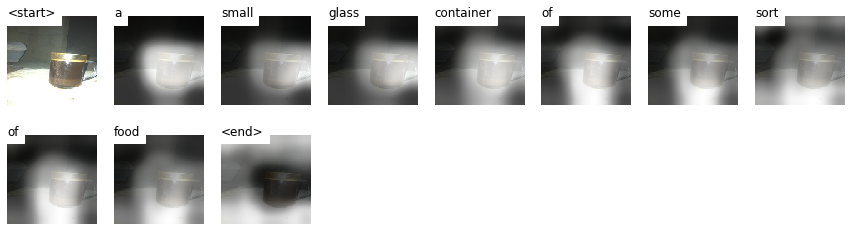

In [58]:
%run visualize_att.py --image 'VizWiz_val_00001623.jpg' --encoder_path 'models/encoder-att-8.ckpt'\
--decoder_path 'models/decoder-att-8.ckpt' 

### Train vs Validation loss for Transformer

<start> <start> a computer screen with a windows error message on it . <end>
{'testlen': 10, 'reflen': 10, 'guess': [10, 9, 8, 7], 'correct': [6, 4, 3, 2]}
ratio: 0.9999999999000002
bleu = [0.5999999998800002, 0.516397779388174, 0.4641588832628592, 0.41113361681017657]
cider = 1.3073499622801017
rouge = 0.47213622291021673


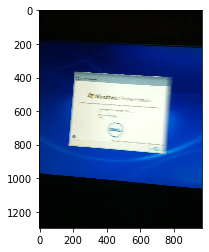

In [9]:
%run sample.py --image 'VizWiz_val_00000005.jpg' --image_path 'data/val' \
--model_path  'models/model_tr_5.ckpt'  --vocab_path 'data/vocab.pkl' --model_type 'transformer' 

<start> <start> a room with a wooden floor and a wooden door with a window and a window with a window
{'testlen': 18, 'reflen': 11, 'guess': [18, 17, 16, 15], 'correct': [5, 3, 0, 0]}
ratio: 1.6363636362148761
bleu = [0.27777777776234575, 0.2214037213723619, 1.4523901111461338e-06, 3.780416479719585e-09]
cider = 0.20114400603916027
rouge = 0.3152454780361757


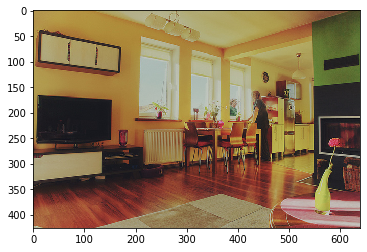

In [3]:
%run sample.py --image '000000000139.jpg' --image_path 'data/val2017'\
--model_path 'models/model_tr_5.ckpt' --vocab_path 'data/vocab.pkl' --model_type 'transformer'\
--caption_path 'data/captions_val2017.json'

<start> <start> a small white dog with a black and white dog on it <end>
{'testlen': 11, 'reflen': 10, 'guess': [11, 10, 9, 8], 'correct': [4, 1, 0, 0]}
ratio: 1.09999999989
bleu = [0.36363636360330587, 0.19069251783091612, 1.5927279408986697e-06, 4.740604259372055e-09]
cider = 0.3199539399235545
rouge = 0.216696269982238


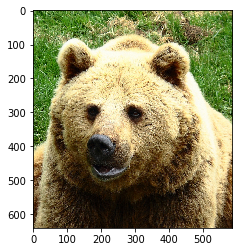

In [4]:
%run sample.py --image '000000000285.jpg' --image_path 'data/val2017'\
--model_path  'models/model_tr_5.ckpt' --vocab_path 'data/vocab.pkl' --model_type 'transformer'\
--caption_path 'data/captions_val2017.json'

### Transformer

In [ ]:
print('VizWiz image caption prediction for trained from scratch  on VizWiz  LSTM')
%run sample.py --image '000000033368.jpg' --image_path 'data/val2017' --model_path 'models_tr_3/model_tr3_21.ckpt'\
--vocab_path 'data/vocab.pkl' --num_layers 1 --model_type 'transformer'